<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 8 - Convolutional Neural Network

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


# Agenda




*   Tensorflow 2 - Model API
*   Convolution Block and its components in TF2
*   Implement a CNN on Mnist-Fashion dataset



# Model vs. Sequential

**Option 1: Sequential**

```
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
# option 1
model = Sequential()
model.add(Dense(units=_, 
                activation=_, 
                kernel_initializer=_, 
                kernel_regularizer=_,
                input_shape=(__)))
model.add(Dense(units=_, 
                activation=_, 
                kernel_initializer=_, 
                kernel_regularizer=_ ))
model.add(Dense(units=_, 
                activation=_, 
                kernel_initializer=_, 
                kernel_regularizer=_ ))
```


```
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
# option 1
model = Sequential()
model.add(
    Conv2D(
      filters=_, # number of filters
      kernel_size=_, 
      strides=_, 
      padding=_, 
      activation=_, 
      kernel_initializer=_, 
      kernel_regularizer=_,
      input_shape=(____)
    )
)
```



**Option 2: Model**

```
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model

input = Input(shape=())
dense = Dense(units=_, 
              activation=_,
              kernel_initializer=_, 
              kernel_regularizer=_)(input)
dense = Dense(units=_, 
              activation=_,
              kernel_initializer=_, 
              kernel_regularizer=_)(dense)
...
output = Dense(1, activation='sigmoid)(dense)

model = Model(input, output)
```

```
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model

input = Input(shape=(____))
cov = Conv2D(
        filters=_, 
        kernel_size=_, 
        strides=_, 
        padding=_, 
        activation=_, 
        kernel_initializer=_, 
        kernel_regularizer=_,
)(input)
... more layers (previous_layer)
output = output layer (previous_layer)

model = Model(input, output)
```


# A Basic Convolution Block

In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

model = Sequential()
model.add(Conv2D(
    filters=32,
    kernel_size=3,
    padding='same',
    activation='relu',
    input_shape=(100,100,3)
))
model.add(
    MaxPooling2D()
)
model.add(
    Flatten()
)
# add MLP here
# add output layer here (either logistic, softmax or linear)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Excercise: Fashion ... again

## Prepare dataset

**Import libraries**

In [ ]:
from tensorflow.random import set_seed
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

**Labels**

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
#               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

**Load data from Keras**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Split Train Set into Train Set and Validation Set**

In [ ]:
# TODOs
# 1. Split Train Set into Train Set and Validation Set, size of validation = 10k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, shuffle=True, stratify=y_train, random_state=42)

**One Hot Encoding label**

In [ ]:
# TODOs
# 1. One-hot encoding y
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)


**Scale data**

In [ ]:
# TODO
# 1. Convert X to float and / 255 (MinMaxScaler)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0



## Visualize data

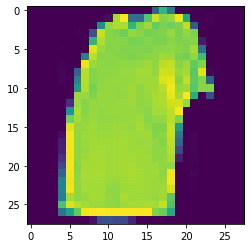

In [ ]:
target = np.random.choice(np.where(y_train == 0)[0])
X_train[target].shape
plt.imshow(X_train[target])

In [ ]:
np.where(y_train == 1)[0]

array([   21,    46,    65, ..., 49994, 49996, 49999])

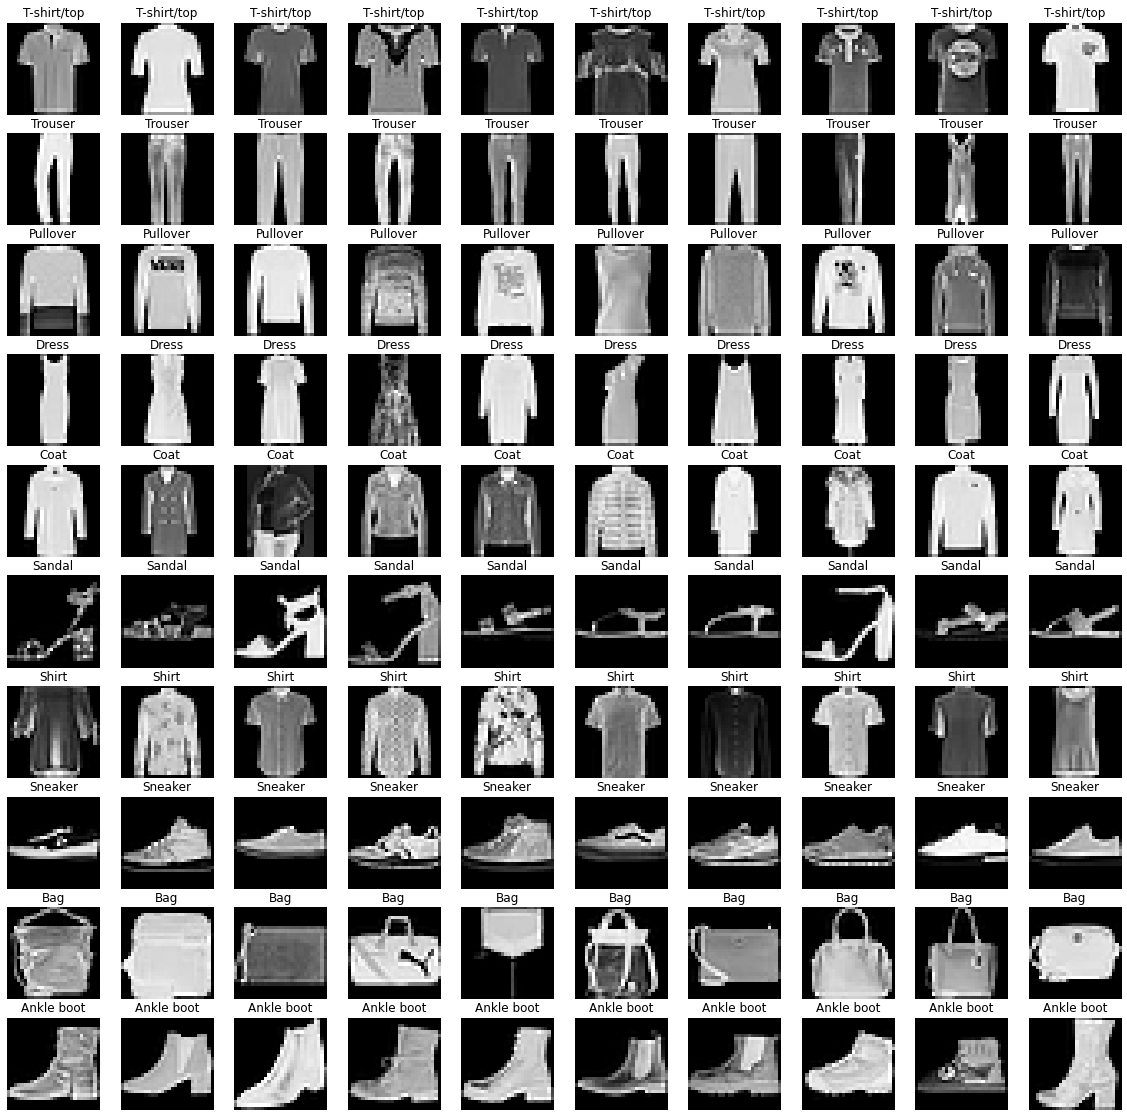

In [ ]:
# TODOs
# 1. Create figure with 10 columns and 10 rows
# 2. From each label, plot 10 images in 1 row
fig, axs = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(y_train == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray')
    axs[i][j].set_title(class_names[i])
    

## Define CNN model

**A function help drawing Learning Curve**

In [ ]:
# TODO
# 1. complete the draw_chart() function below

def draw_chart(history):
  plt.figure(figsize=(15,8))

  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Losses vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])

  plt.show()

Recall that our data shape is (num_of_samples, 28, 28) but Conv2D layer expect input is a 3D tensor, we have to convert our data to 3D

**Solution**

Reshape data from (28,28) to (28,28,1)

In [ ]:
X_train = X_train[...,None]
X_val = X_val[...,None] 
X_test = X_test[...,None]

# X_train = X_train.reshape((28,28,1))
# X_train = np.expand_dims(X_train, axis = -1)

**Create your CNN model**

In [ ]:
from tensorflow.random import set_seed

set_seed(42)

def create_cnn_block(layer, filters, k_size, use_maxpool=True):
  layer = Conv2D(
                filters,
                k_size,
                padding='same',
                activation='relu',
                kernel_initializer='he_normal')(layer)
  layer = BatchNormalization()(layer)
  if use_maxpool:
    layer = MaxPooling2D()(layer)
  return layer

input = Input(shape=X_train.shape[1:])
cov_block_1 = create_cnn_block(input, 16, 3, use_maxpool=False)
cov_block_1 = create_cnn_block(cov_block_1, 16, 3)
cov_block_2 = create_cnn_block(cov_block_1, 32, 3, use_maxpool=False)
cov_block_2 = create_cnn_block(cov_block_2, 32, 3)

dense = Flatten()(cov_block_2)
dense = Dense(256)(dense)
dense = BatchNormalization()(dense)
dense = Activation('relu')(dense)
dense = Dense(256)(dense)
dense = BatchNormalization()(dense)
dense = Activation('relu')(dense)
out = Dense(10, activation='softmax')(dense)

model = Model(input, out)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)
stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, Y_train, 
            epochs=1000,
            validation_data=(X_val, Y_val),
            batch_size=512,
            callbacks=[stop, reduce_lr])

Epoch 1/1000
98/98 [==============================] - 4s 40ms/step - loss: 0.4136 - accuracy: 0.8530 - val_loss: 1.3019 - val_accuracy: 0.5707
Epoch 2/1000
98/98 [==============================] - 3s 34ms/step - loss: 0.2279 - accuracy: 0.9173 - val_loss: 0.9431 - val_accuracy: 0.6845
Epoch 3/1000
98/98 [==============================] - 3s 34ms/step - loss: 0.1674 - accuracy: 0.9389 - val_loss: 0.7900 - val_accuracy: 0.7692
Epoch 4/1000
98/98 [==============================] - 3s 34ms/step - loss: 0.1208 - accuracy: 0.9579 - val_loss: 0.3981 - val_accuracy: 0.8633
Epoch 5/1000
98/98 [==============================] - 3s 34ms/step - loss: 0.0842 - accuracy: 0.9711 - val_loss: 0.2648 - val_accuracy: 0.9131
Epoch 6/1000
98/98 [==============================] - 3s 34ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.2660 - val_accuracy: 0.9154
Epoch 7/1000
98/98 [==============================] - 3s 34ms/step - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.3057 - val_accuracy: 0.9134

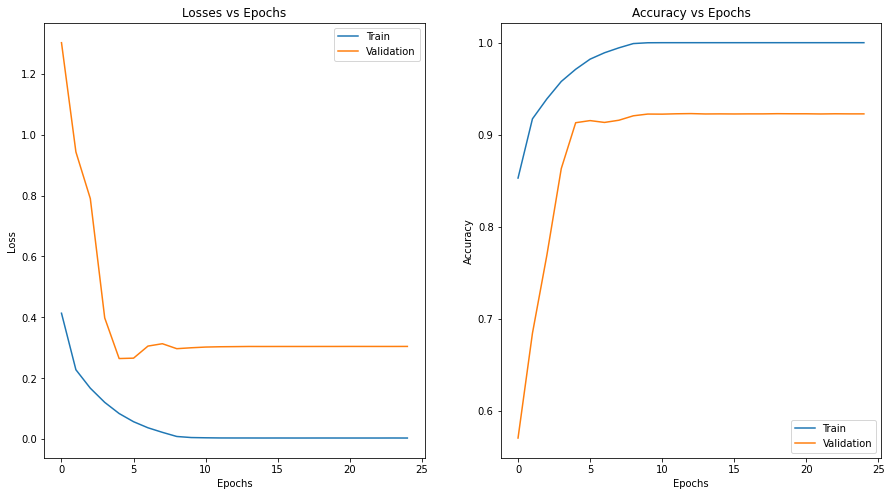

313/313 [==============================] - 1s 4ms/step - loss: 0.2987 - accuracy: 0.8987


[0.2987203001976013, 0.8986999988555908]

In [ ]:
draw_chart(history)
model.evaluate(X_train, Y_train)
model.evaluate(X_val, Y_val)
model.evaluate(X_test, Y_test)


## Error Analysis

**Question: How to identify wrongly predicted Test images?**

(10000,)
(1013,)


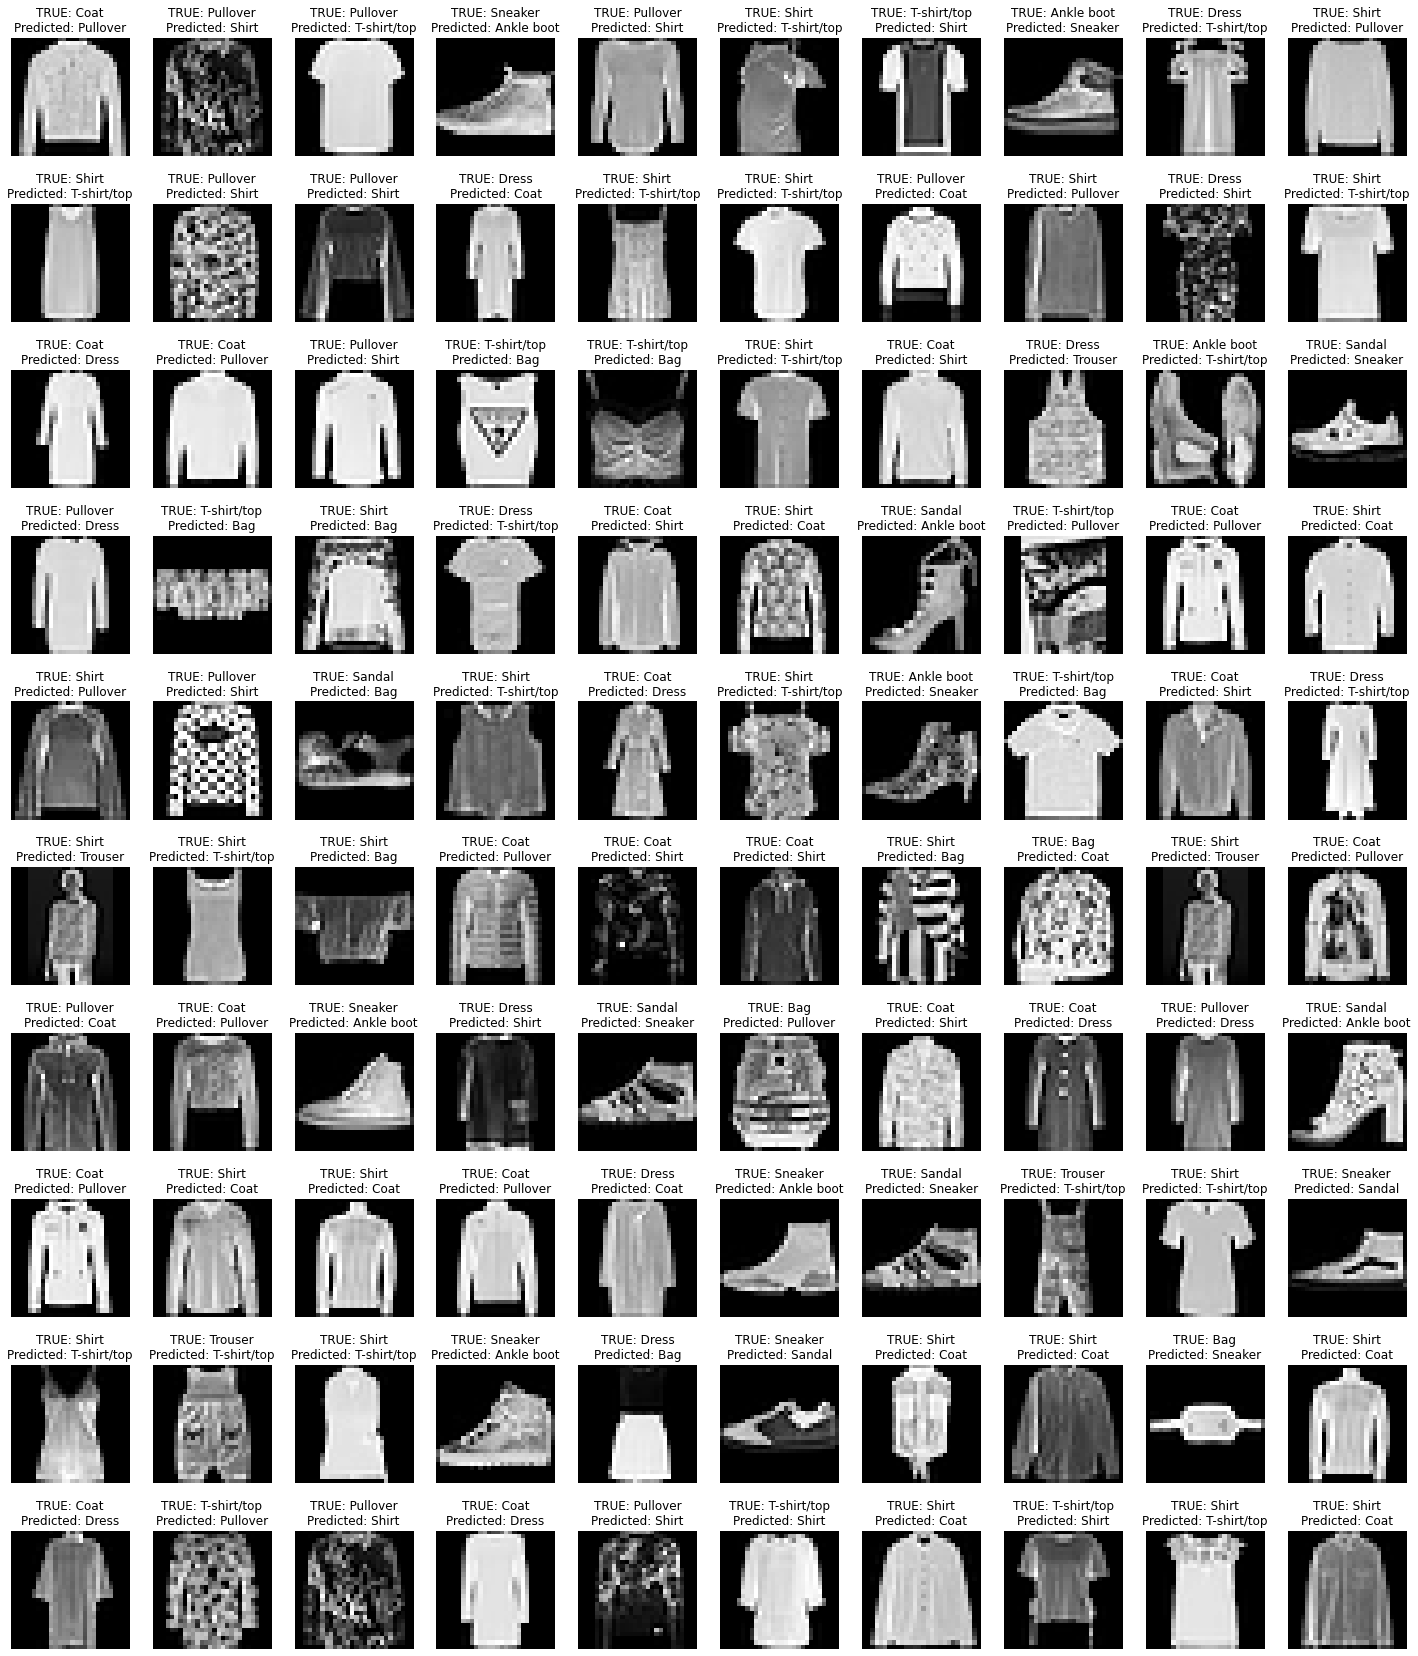

In [ ]:
y_pred = model.predict(X_test)
# print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_test.shape)
wrong_predict = np.where(y_pred != y_test)[0]
print(wrong_predict.shape)
fig, axs = plt.subplots(10,10)
fig.set_figheight(30)
fig.set_figwidth(25)
for i in range(10):
  for j in range(10):
    target = np.random.choice(wrong_predict)
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_test[target]), cmap='gray')
    name = 'TRUE: {}\nPredicted: {}'.format(class_names[y_test[target]], class_names[y_pred[target]])
    axs[i][j].set_title(name)

    